In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =round(Ntr/batch_size)*300
lr =1.4e-3
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    #forward pass
    x=x_train[indices]
    y=y_train[indices]
    y_pred=x.dot(w1)+b1
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1))
    loss_history.append(loss)
    train_acc=1.0-1/Ntr*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    if t%10==0:
        print("iterations %d / %d: loss %f : train_acc %f " % (t,iterations,loss,train_acc))
    #backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred)+reg*w1
    db1=dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
w1: (3072, 10)
b1: (10,)
iterations 0 / 300: loss 1.000025 : train_acc -2.368300 
iterations 10 / 300: loss 0.957851 : train_acc -2.504160 
iterations 20 / 300: loss 0.939455 : train_acc -2.496380 
iterations 30 / 300: loss 0.926766 : train_acc -2.471300 
iterations 40 / 300: loss 0.916826 : train_acc -2.468920 
iterations 50 / 300: loss 0.908543 : train_acc -2.465420 
iterations 60 / 300: loss 0.901391 : train_acc -2.466160 
iterations 70 / 300: loss 0.895077 : train_acc -2.460280 
iterations 80 / 300: loss 0.889418 : train_acc -2.467120 
iterations 90 / 300: loss 0.884288 : train_acc -2.432440 
iterations 100 / 300: loss 0.879602 : train_acc -2.448640 
iterations 110 / 300: loss 0.875292 : train_acc -2.469180 
iterations 120 / 300: loss 0.871310 : train_acc -2.442580 
iterations 130 / 300: loss 0.867613 : train_acc -2.439460 
iterations 140 / 300: loss 0.864172 : train_acc -2.445240 
iterations 150 / 300: loss 0.860958 : train_acc -2.42

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

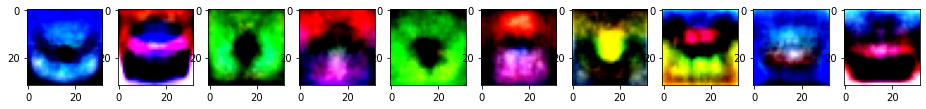

In [5]:
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()   

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H ,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
batch_size = Ntr
iterations =round(Ntr/batch_size)*300
lr =1.4e-3
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    #forward pass
    x=x_train[indices]
    y=y_train[indices]
    h=1.0/(1.0 + np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    train_acc=1.0-1/Ntr*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    if t%10==0:
        print("iterations %d / %d: loss %f : train_acc %f " % (t,iterations,loss,train_acc))
    #backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay


x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
iterations 0 / 300: loss 0.999966 : train_acc -3.500000 
iterations 10 / 300: loss 0.904656 : train_acc -3.500000 
iterations 20 / 300: loss 0.900224 : train_acc -3.500000 
iterations 30 / 300: loss 0.900011 : train_acc -3.500000 
iterations 40 / 300: loss 0.900001 : train_acc -3.500000 
iterations 50 / 300: loss 0.900000 : train_acc -3.483900 
iterations 60 / 300: loss 0.900000 : train_acc -2.123460 
iterations 70 / 300: loss 0.900000 : train_acc -2.177400 
iterations 80 / 300: loss 0.900000 : train_acc -2.227360 
iterations 90 / 300: loss 0.900000 : train_acc -2.243640 
iterations 100 / 300: loss 0.900000 : train_acc -2.248380 
iterations 110 / 300: loss 0.900000 : train_acc -2.247840 
iterations 120 / 300: loss 0.900000 : train_acc -2.251520 
iterations 130 / 300: loss 0.900000 : train_acc -2.256800 
iterations 140 / 300: loss 0.900000 : train_acc -2.255240 
iterations 150 / 300: loss 0.900000 : train_acc -2.258880 
iterations 160 / 30

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
H=200
std=1e-5
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H ,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
batch_size = 500
iterations =300
lr =1.4e-3
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    #forward pass
    x=x_train[indices]
    y=y_train[indices]
    h=1.0/(1.0 + np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    loss=1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    train_acc=1.0-1/Ntr*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    if t%10==0:
        print("iterations %d / %d: loss %f : train_acc %f " % (t,iterations,loss,train_acc))
    #backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h))+reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1-=lr*dw1
    w2-=lr*dw2
    b1-=lr*db1
    b2-=lr*db2
    lr*=lr_decay

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
iterations 0 / 300: loss 99.994330 : train_acc -2.100000 
iterations 10 / 300: loss 2253.886873 : train_acc -2.100000 
iterations 20 / 300: loss 93.395684 : train_acc -2.100000 
iterations 30 / 300: loss 90.010022 : train_acc -2.100000 
iterations 40 / 300: loss 90.004299 : train_acc -2.100000 
iterations 50 / 300: loss 90.004288 : train_acc -2.100000 
iterations 60 / 300: loss 90.004288 : train_acc -2.100000 
iterations 70 / 300: loss 90.004288 : train_acc -2.100000 
iterations 80 / 300: loss 90.004288 : train_acc -2.100000 
iterations 90 / 300: loss 90.004288 : train_acc -2.100000 
iterations 100 / 300: loss 90.004288 : train_acc -2.100000 
iterations 110 / 300: loss 90.004288 : train_acc -2.099060 
iterations 120 / 300: loss 90.004288 : train_acc -2.467140 
iterations 130 / 300: loss 90.004288 : train_acc -2.151600 
iterations 140 / 300: loss 90.004288 : train_acc -2.423480 
iterations 150 / 300: loss 90.004288 : train_acc -2.568640 
i

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))
#x_train=tf.keras.utils.to_categorical(x_train)
#y_train=tf.keras.utils.to_categorical(y_train)
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
model.compile(optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
print(model.summary())

model.fit(x_train,y_train,epochs=300,batch_size=50)
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)
print("\nTest accuracy:", test_acc)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

KeyboardInterrupt: 